In [2]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [3]:
df = pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Startup.csv")

In [4]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [5]:
X = df.drop(columns="Profit")
y = df["Profit"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 667)

In [7]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

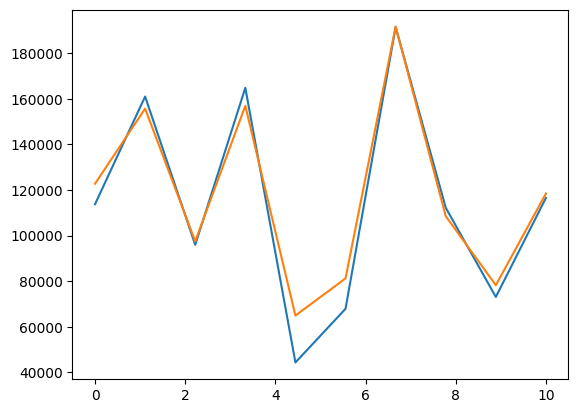

In [9]:
l = y_test_pred.shape[0]
x = np.linspace(0,l,l)

plt.subplots()
plt.plot(x,y_test_pred)
plt.plot(x, y_test)


In [10]:
r2score = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

In [11]:
print("R2_score: ", r2score)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

R2_score:  0.9441590602423614
MAE:  6863.327578772788
MSE:  81932298.4533166
RMSE:  9051.646173670102


In [12]:
joblib.dump(model,'regression_test.pkl')

['regression_test.pkl']

In [13]:
newmodel = joblib.load('regression_test.pkl')
newmodel

LinearRegression()

In [14]:
newmodel.predict([[324,34,56]])[0]

c:\Users\ifoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


46990.028023760206

In [ ]:
import mlem

In [ ]:
#Save model

mlem.api.save(model,
              'model_', # model_.mlem
              sample_data = X_train #features
              )

In [ ]:
!cat model_.mlem

In [ ]:
## Load Model

new_model = mlem.api.load('model_.mlem')

new_model.predict(X_test)

In [ ]:
new_model.predict([[1,1,1],
                   [2,3,4]])

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import mlem


def main():

    st.title("template")

    new_model = mlem.api.load('model_.mlem')

    x1 = st.slider("Inserire R&D Spend:", 1, 100000, 1)
    x2 = st.slider("Inserire Administration:", 1, 100000, 1)
    x3 = st.slider("Inserire Marketing Spend:", 1, 100000, 1)

    #array = np.array([x1,x2,x3])

    res = new_model.predict([[x1,x2,x3]])[0]
    
    st.title("Model predict")
    st.title(round(res, 2))





if __name__ == "__main__":
    main()